In [1]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Grabbing the nominees to get latest years data
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'ACTOR IN A SUPPORTING ROLE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    actor = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['actor'] = actor
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

In [3]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')
#best_2016

In [4]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','winner','name','film'])
df_movies = pd.read_csv('movies.csv')
df_credits = pd.read_csv('credits.csv')

In [5]:
#View data
print(df_awards.head())
print("-------------")
print(df_movies.head())
print("-------------")
print(df_credits.head())

   year  ceremony    award  winner                 name              film
0  1928         1    Actor     NaN  Richard Barthelmess         The Noose
1  1928         1    Actor     1.0        Emil Jannings  The Last Command
2  1928         1  Actress     NaN       Louise Dresser   A Ship Comes In
3  1928         1  Actress     1.0         Janet Gaynor        7th Heaven
4  1928         1  Actress     NaN       Gloria Swanson    Sadie Thompson
-------------
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.c

In [6]:
# Testing
# Get list of awards to make sure we include all the right ones
#df_awards.award.unique()

In [7]:
# append the data we scrapped to the df_awards
data=[]
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Actor in a Supporting Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Actor in a Supporting Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

for k,v in best_2018.items():
    row = []
    row.append(['2018', 91, 'Actor in a Supporting Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

# pass the column name to the columns!!! Or there will be a runtime error
df_awards=df_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','winner','name','film']),ignore_index=True)

df_awards

,year,ceremony,award,winner,name,film
0,1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [8]:
# Data Manipulation
#Joining the credits and movies dataframes
if 'title' in df_credits.columns: 
  df_credits = df_credits.drop('title',axis=1) 
df_credits_movies = df_credits.set_index('movie_id').join(df_movies.set_index('id'))

df_credits_movies.columns

Index(['cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
#df_credits_movies.dtypes
# Reset the data types and get the earliest date of release_date
df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'])
#get the earliest release date from the dataset
min_year = min(df_credits_movies['release_date']) #1916-09-04
max_year = max(df_credits_movies['release_date']) #2017-02-03

In [10]:
# Select movies that are in 'Actor in a Supporting Role' categories -> df_picture_awards
#join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)

df_picture_awards = df_awards.loc[df_awards['award'].isin(['Actor in a Supporting Role'])]
df_picture_awards.reset_index(drop = True, inplace = True)
df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]

print("--------------")
print(df_picture_awards.columns)
print("--------------")
print(df_credits_movies.columns)

--------------
Index(['year', 'ceremony', 'award', 'winner', 'name', 'film'], dtype='object')
--------------
Index(['cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


In [11]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_picture_awards['winner'].fillna(1,inplace = True)
df_picture_awards

,year,ceremony,award,winner,name,film
0,1936,9,Actor in a Supporting Role,1.0,Mischa Auer,My Man Godfrey
1,1936,9,Actor in a Supporting Role,1.0,Walter Brennan,Come and Get It
2,1936,9,Actor in a Supporting Role,1.0,Stuart Erwin,Pigskin Parade
3,1936,9,Actor in a Supporting Role,1.0,Basil Rathbone,Romeo and Juliet
4,1936,9,Actor in a Supporting Role,1.0,Akim Tamiroff,The General Died at Dawn
5,1937,10,Actor in a Supporting Role,1.0,Ralph Bellamy,The Awful Truth
6,1937,10,Actor in a Supporting Role,1.0,Thomas Mitchell,The Hurricane
7,1937,10,Actor in a Supporting Role,1.0,Joseph Schildkraut,The Life of Emile Zola
8,1937,10,Actor in a Supporting Role,1.0,H. B. Warner,Lost Horizon
9,1937,10,Actor in a Supporting Role,1.0,Roland Young,Topper


In [12]:
# join df_picture_awards with df_credits_movies
#cleaning names/punctuation
import re
movieName = [re.sub(r'[^\w\s]','',x) for x in df_picture_awards['film'].str.lower().str.strip().values]
title = [re.sub(r'[^\w\s]','',x) for x in df_credits_movies['title'].str.lower().str.strip().values]
#then, change the title in the movie to lower case
df_picture_awards.loc[:,'title'] = movieName #change the string to lower case
df_credits_movies.loc[:,'title']= title
# check the dataframe, we can see the string in actor now is valid

print(df_picture_awards)

print(df_credits_movies)

     year  ceremony                       award  winner                 name  \
0    1936         9  Actor in a Supporting Role     1.0          Mischa Auer   
1    1936         9  Actor in a Supporting Role     1.0       Walter Brennan   
2    1936         9  Actor in a Supporting Role     1.0         Stuart Erwin   
3    1936         9  Actor in a Supporting Role     1.0       Basil Rathbone   
4    1936         9  Actor in a Supporting Role     1.0        Akim Tamiroff   
5    1937        10  Actor in a Supporting Role     1.0        Ralph Bellamy   
6    1937        10  Actor in a Supporting Role     1.0      Thomas Mitchell   
7    1937        10  Actor in a Supporting Role     1.0   Joseph Schildkraut   
8    1937        10  Actor in a Supporting Role     1.0         H. B. Warner   
9    1937        10  Actor in a Supporting Role     1.0         Roland Young   
10   1938        11  Actor in a Supporting Role     1.0       Walter Brennan   
11   1938        11  Actor in a Supporti

In [13]:
# join the two tables, merge the data
df = df_picture_awards.merge(df_credits_movies, left_on='title', right_on='title', how='right')
df = df.reset_index(drop=True)
#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
#df.drop('name',axis = 1, inplace = True)
df.drop('film',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['winner'].fillna(0,inplace=True) #fill NA with 0
df

,winner,name,title,cast,crew,budget,genres,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,1.0,Thomas Mitchell,the hurricane,"[{""cast_id"": 1, ""character"": ""Rubin \""Hurrican...","[{""credit_id"": ""5558a4e3c3a368776a0084cd"", ""de...",50000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 378, ""name"": ""prison""}, {""id"": 2792, ""...",en,The Hurricane,...,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-09-17,73956241,146.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,His greatest fight was for justice.,7.2,396
1,1.0,Robert Morley,marie antoinette,"[{""cast_id"": 19, ""character"": ""Marie Antoinett...","[{""credit_id"": ""52fe431ec3a36847f803b8d9"", ""de...",40000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 54612, ""name"": ""shoe""}, {""id"": 159431,...",en,Marie Antoinette,...,"[{""name"": ""American Zoetrope"", ""id"": 70}, {""na...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2006-05-24,60474340,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Rumor. Scandal. Fame. Revolution.,6.5,642
2,1.0,Harry Carey,mr smith goes to washington,"[{""cast_id"": 9, ""character"": ""Jefferson Smith""...","[{""credit_id"": ""52fe4383c3a36847f8059f93"", ""de...",1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 417, ""name"": ""corruption""}, {""id"": 521...",en,Mr. Smith Goes to Washington,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-10-19,9600000,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Romance, drama, laughter and heartbreak... cre...",7.9,241
3,1.0,Claude Rains,mr smith goes to washington,"[{""cast_id"": 9, ""character"": ""Jefferson Smith""...","[{""credit_id"": ""52fe4383c3a36847f8059f93"", ""de...",1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 417, ""name"": ""corruption""}, {""id"": 521...",en,Mr. Smith Goes to Washington,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-10-19,9600000,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Romance, drama, laughter and heartbreak... cre...",7.9,241
4,1.0,Donald Crisp,how green was my valley,"[{""cast_id"": 2, ""character"": ""Mr. Gruffydd"", ""...","[{""credit_id"": ""52fe4639c3a36847f80f369b"", ""de...",1250000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 1209, ""name"": ""wales""}, {""id"": 11004, ...",en,How Green Was My Valley,...,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1941-10-28,6000000,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Millions Have Read This Great Novel... Million...,6.8,72
5,1.0,J. Carrol Naish,sahara,"[{""cast_id"": 1, ""character"": ""Dirk Pitt"", ""cre...","[{""credit_id"": ""536b5cb40e0a2647db00b826"", ""de...",130000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 168297, ""name"": ""tyrant""}, {""id"": 1683...",en,Sahara,...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-04-06,119269486,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Dirk Pitt. Adventure has a new name.,5.7,434
6,1.0,Claude Rains,casablanca,"[{""cast_id"": 2, ""character"": ""Rick Blaine"", ""c...","[{""credit_id"": ""52fe4233c3a36847f800b88f"", ""de...",878000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 128, ""name"": ""love triangle""}, {""id"": ...",en,Casablanca,...,"[{""name"": ""Warner Bros."", ""id"": 6194}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1942-11-26,10462500,10

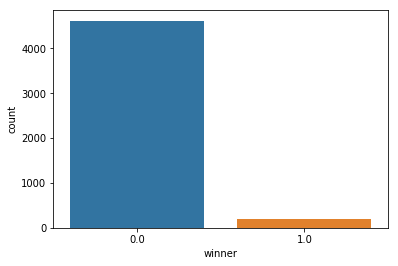

In [14]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='winner', data = df)


In [15]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['winner'] == 0])) #4618
print(len(df.loc[df['winner'] == 1])) #190

4618
190


In [16]:
#balance the data
df_subset_0 = df.loc[df['winner'] == 0]
df_subset_1 = df.loc[df['winner'] == 1]

df_subset_0.drop('winner',axis=1,inplace=True)
df_subset_1.drop('winner',axis=1,inplace=True)

#sample with replacement
df_subset_0 = df_subset_0.sample(400) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
df_new = df_subset.merge(df_picture_awards, left_on = 'name', right_on = 'name', how = 'left')
df_new = df_new.fillna(0)

In [17]:
print(len(df_new))

703


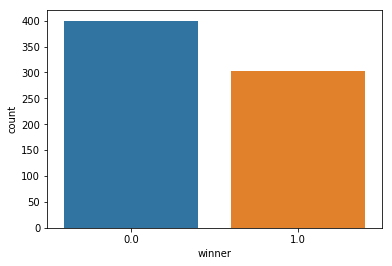

In [18]:
sns.countplot(x='winner', data = df_new)

In [19]:
#check number of null values in the dataset
df_new.isnull().sum()

name                    0
title_x                 0
cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_average            0
vote_count              0
year                    0
ceremony                0
award                   0
winner                  0
film                    0
title_y                 0
dtype: int64

In [20]:
#Exploratory Data Analysis

# check the data types and select numeric variables
df_new.dtypes

name                            object
title_x                         object
cast                            object
crew                            object
budget                           int64
genres                          object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
vote_average                   float64
vote_count                       int64
year                            object
ceremony                       float64
award                           object
winner                         float64
film                     

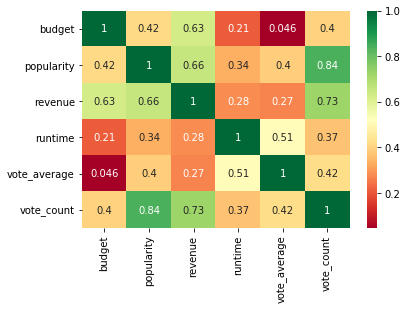

In [21]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)

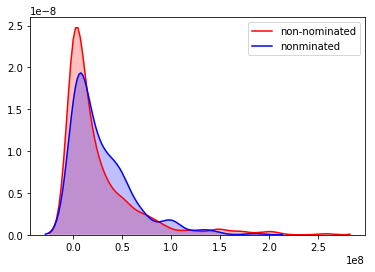

In [22]:
# Density Curve
# budget
budget0 = df_new[df_new['winner'] == 0]['budget']
budget1 = df_new[df_new['winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

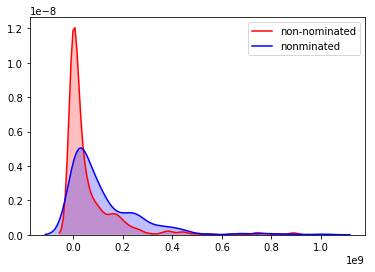

In [23]:
# revenue
# density curve
revenue0 = df_new[df_new['winner'] == 0]['revenue']
revenue1 = df_new[df_new['winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

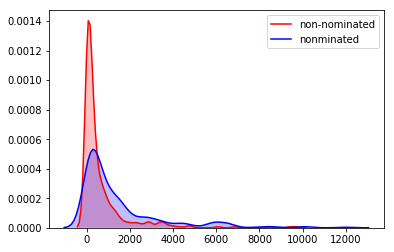

In [24]:
# vote count
vc0 = df_new[df_new['winner'] == 0]['vote_count']
vc1 = df_new[df_new['winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

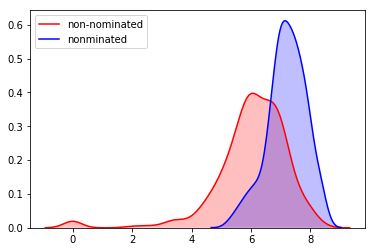

In [25]:
# vote average
va0 = df_new[df_new['winner'] == 0]['vote_average']
va1 = df_new[df_new['winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

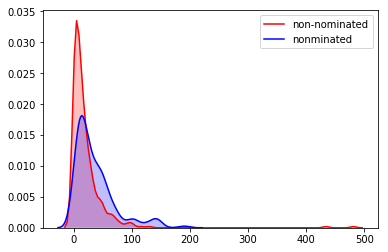

In [26]:
# popularity
popularity0 = df_new[df_new['winner'] == 0]['popularity']
popularity1 = df_new[df_new['winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

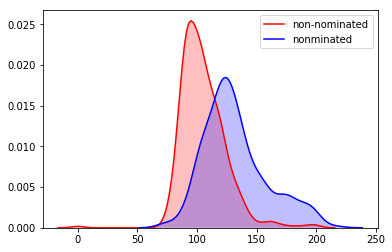

In [27]:
#runtime
runtime0 = df_new[df_new['winner'] == 0]['runtime']
runtime1 = df_new[df_new['winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [28]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    genres = json.loads(df_new.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df_new.loc[i,'winner'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df_new.loc[i,'winner'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

In [29]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

     Action    Horror    Family  Science Fiction  Animation   Western  \
0  0.085577  0.053846  0.047115         0.040385   0.014423  0.005769   
1  0.052006  0.005944  0.011887         0.002972   0.004458  0.016345   

   TV Movie     Music   History   Foreign  Adventure    Comedy     Drama  \
0  0.001923  0.021154  0.011538  0.001923   0.066346  0.135577  0.182692   
1  0.000000  0.013373  0.072808  0.000000   0.032689  0.078752  0.404160   

        War  Documentary   Mystery   Fantasy     Crime   Romance  Thriller  
0  0.006731     0.009615  0.028846  0.032692  0.062500  0.076923  0.114423  
1  0.032689     0.000000  0.023774  0.005944  0.092125  0.065379  0.084695  


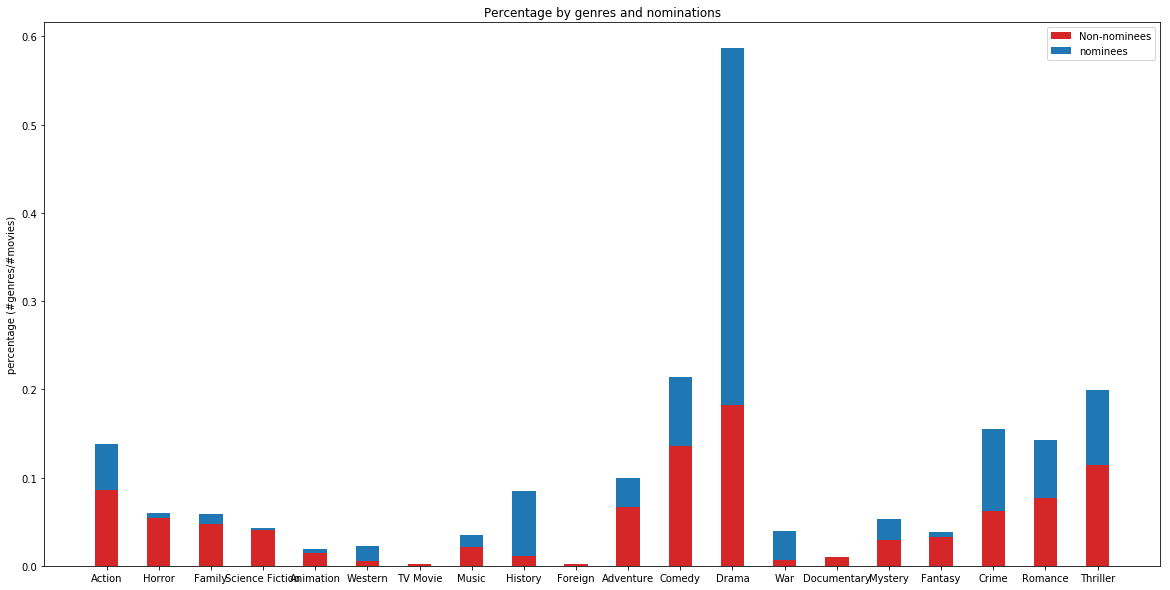

In [30]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.45

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])


plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [31]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [32]:
df2 = feature_engineering("cast", df_new, "name")
df2 = df2.drop('cast', axis = 1) #drop the column after feature engineering

In [33]:
# director
crew_name = {}

for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] not in crew_name:
                crew_name[it['name']] = 1
            else:
                crew_name[it['name']]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in crew_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] in final_crew:
                index = final_crew[it['name']]
                np_crew[row][index] = 1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [34]:
df3=df3.drop(['crew'],axis=1)
#genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)

In [35]:
df8

,name,title_x,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,sw,el,ga,tr,fa,vi,km,fi,ur,af
0,0,the fp,0,en,The FP,Two rival gangs fight for control of Frazier P...,0.838957,2011-03-13,0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,in dreams,0,en,In Dreams,Claire Cooper dreams strange things from time ...,3.226243,1999-01-15,0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,the bank job,20000000,en,The Bank Job,Terry is a small-time car dealer trying to lea...,30.387754,2008-02-28,64822796,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,for colored girls,0,en,For Colored Girls,About existence from the perspective of 20 nam...,1.934524,2010-11-05,37000000,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,intolerance,385907,en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,1916-09-04,8394751,197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,changeling,55000000,en,Changeling,Christine Collins is overjoyed when her kidnap...,27.509160,2008-01-30,113020255,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,love jones,10000000,en,Love Jones,Darius Lovehall is a young black poet in Chica...,1.000178,1997-03-14,0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,swimming pool,7800000,en,Swimming Pool,In the middle of this amusing thriller is a re...,11.000654,2003-05-18,22441323,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,beyond the lights,7000000,en,Beyond the Lights,Noni Jean is a hot new rising star. But not al...,8.079046,2014-09-10,14618727,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,abcd any body can dance,0,hi,एबीसीडी,When a capable dancer is provoked by the evil ...,1.294967,2013-02-07,222000,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# drop the columns not used
df_clean = df8.drop(["film", "title_x", "title_y", "original_title","overview","name","original_language","tagline","status","release_date","award"],axis=1)
# 

In [37]:
df_clean

,budget,popularity,revenue,runtime,vote_average,vote_count,year,ceremony,winner,Annette Bening,...,sw,el,ga,tr,fa,vi,km,fi,ur,af
0,0,0.838957,0,82.0,4.5,11,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3.226243,0,100.0,5.4,44,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000000,30.387754,64822796,112.0,6.6,697,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.934524,37000000,134.0,7.0,22,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,385907,3.232447,8394751,197.0,7.4,60,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,55000000,27.509160,113020255,141.0,7.3,1131,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10000000,1.000178,0,104.0,8.1,12,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7800000,11.000654,22441323,102.0,6.4,153,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7000000,8.079046,14618727,116.0,7.0,139,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1.294967,222000,160.0,5.6,10,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Model Training
# split
X = df_clean[df_clean.columns.difference(['winner'])]
# X = StandardScaler().fit_transform(X)
y = df_clean['winner']
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5.0, random_state=0)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)

In [40]:
#X

In [41]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
print(y_test.index)
# df8['best_actor'][y_test.index]

[0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
Int64Index([539, 477, 548, 605, 518,  14,  31, 367, 317, 502,
            ...
            693, 695, 240,  17, 360, 573, 680, 334, 408, 648],
           dtype='int64', length=141)


In [43]:
logisticRegr.score(X_test, y_test) # 0.6737588652482269

0.6737588652482269

In [44]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
sensitivity = tp/(tp+fn)
print(sensitivity) # 0.5

0.5


In [45]:
# Improvement: Cross Validation
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.9033763714614779
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])

0.8409650239437473
